<a href="https://colab.research.google.com/github/FarhatMajidsofi/Python_Projects/blob/main/onehotencoderex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/examples/carprices.csv")
df.head(1)

,Car_Model,Mileage,Sell_Price($),Age(yrs)
0,BMW X5,69000,18000,6


In [ ]:
label_encoder= LabelEncoder()
dataframe_labelencoder = df
dataframe_labelencoder.Car_Model = label_encoder.fit_transform(dataframe_labelencoder.Car_Model)
print(dataframe_labelencoder)

    Car_Model  Mileage  Sell_Price($)  Age(yrs)
0           1    69000          18000         6
1           1    35000          34000         3
2           1    57000          26100         5
3           1    22500          40000         2
4           1    46000          31500         4
5           0    59000          29400         5
6           0    52000          32000         5
7           0    72000          19300         6
8           0    91000          12000         8
9           2    67000          22000         6
10          2    83000          20000         7
11          2    79000          21000         7
12          2    59000          33000         5


In [ ]:
X = dataframe_labelencoder[['Car_Model','Mileage', 'Age(yrs)']].values
print(X)
y = dataframe_labelencoder['Sell_Price($)'].values
print(y)

[[    1 69000     6]
 [    1 35000     3]
 [    1 57000     5]
 [    1 22500     2]
 [    1 46000     4]
 [    0 59000     5]
 [    0 52000     5]
 [    0 72000     6]
 [    0 91000     8]
 [    2 67000     6]
 [    2 83000     7]
 [    2 79000     7]
 [    2 59000     5]]
[18000 34000 26100 40000 31500 29400 32000 19300 12000 22000 20000 21000
 33000]


In [ ]:
column_transfomer = ColumnTransformer([('Car_Model', OneHotEncoder(), [0])],remainder = 'passthrough')

In [ ]:
X = column_transfomer.fit_transform(X)
print(X,'\n')
X = X[:, 1:]
pd.set_option('display.width', 70)
print(X)

[[1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  1.00e+00 0.00e+00 6.90e+04]
 [0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  1.00e+00 0.00e+00 3.50e+04]
 [0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  1.00e+00 0.00e+00 5.70e+04]
 [0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  1.00e+00 0.00e+00 2.25e+04]
 [0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
  1.00e+00 0.00e+00 4.60e+04]
 [0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 5.90e+04]
 [0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 5.20e+04]
 [1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 7.20e+04]
 [0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  0.00e+00 0.00e+00 9.10e+04]
 [1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00

In [ ]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
model.predict([[1,0,14000,4]])

array([41726.894811])

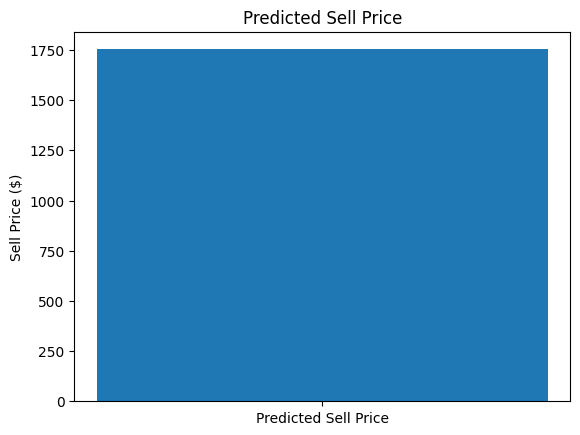

In [ ]:
import matplotlib.pyplot as plt
predicted_sell_price = model.predict([[1, 0, 14000, 34]])
plt.bar(['Predicted Sell Price'], predicted_sell_price)
plt.ylabel('Sell Price ($)')
plt.title('Predicted Sell Price')
plt.show()
